In [1]:
# Boston 주택 가격 예측 모델 프로젝트 (NODE 10-1)

In [24]:
# 데이터 로드 및 전처리
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [25]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [26]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행한다.
# 먼저 입력 데이터의 각 특성의 평균을 뻰다

mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눈다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만든다.

std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눈다.
test_data -= mean
test_data /= std

In [27]:
# 모델 구성 및 컴파일

In [28]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일한다.
# input_shape은 (train_data.shape[1], )으로 구성한다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용한다.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 출력층, 활성화 함수 없음 (회귀 모델)

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [29]:
# 모델 학습

In [30]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습힌다.

history = model.fit(train_data, train_labels, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 1s 8ms/step - loss: 502.5211 - mae: 20.4191 - val_loss: 487.9253 - val_mae: 20.1684
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 362.0206 - mae: 16.7799 - val_loss: 328.4698 - val_mae: 15.9824
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 217.9011 - mae: 12.3015 - val_loss: 174.5557 - val_mae: 10.5508
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 107.8234 - mae: 7.9228 - val_loss: 88.6725 - val_mae: 6.8477
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 62.6842 - mae: 5.8941 - val_loss: 60.8268 - val_mae: 5.5516
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 45.0746 - mae: 4.9155 - val_loss: 42.9423 - val_mae: 4.8610
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 34.4875 - mae: 4.2735 - val_loss: 32.2914 - val_mae: 4.4035
Epoch 8/100
21/21 [==============================] - 0s 

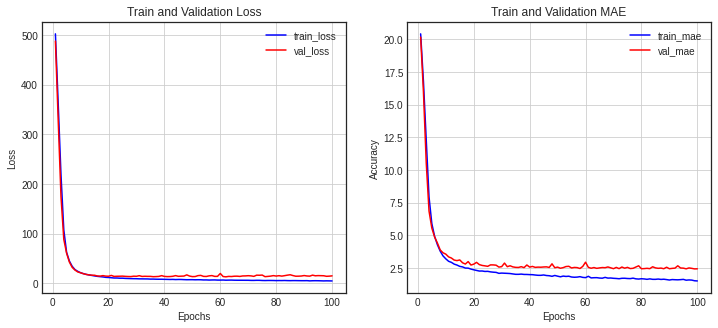

In [32]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [33]:
# 모델 평가 및 예측

In [34]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가한다.

test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print("Mean Absolute Error on Test Data:", test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 22.1450 - mae: 2.8386
Mean Absolute Error on Test Data: 2.8386032581329346


In [35]:
# Reuters 딥러닝 모델 (Node 10-3)

In [36]:
# 데이터 로드 및 전처리

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [37]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리한다.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


# 훈련 데이터의 25%를 검증 데이터로 분리한다.

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)



# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력한다.

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))


6736
2246
2246
46


In [38]:
# 모델 구성 및 컴파일

# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성한다.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 46)               

In [41]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행한다.
# [[YOUR CODE]]from tensorflow.keras import callbacks

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, callbacks

# Load Boston Housing dataset
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Model 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

# Model 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ModelCheckpoint와 EarlyStopping 콜백 함수 적용
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(train_data, train_labels, epochs=100, batch_size=32, 
                    validation_data=(test_data, test_labels), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 585.4249 - mae: 22.2575 - val_loss: 701.1401 - val_mae: 25.1043
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 571.1349 - mae: 22.1540 - val_loss: 663.8745 - val_mae: 24.4576
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 563.8732 - mae: 22.0839 - val_loss: 653.6014 - val_mae: 24.3248
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 554.5805 - mae: 21.9511 - val_loss: 635.0881 - val_mae: 23.9806
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 547.3632 - mae: 21.8170 - val_loss: 617.7225 - val_mae: 23.6365
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 536.8872 - mae: 21.5482 - val_loss: 606.9899 - val_mae: 23.4263
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 534.8056 - mae: 21.6127 - val_loss: 599.2740 - val_mae: 23.2726
Epoch 8/100
13/13 [=====================

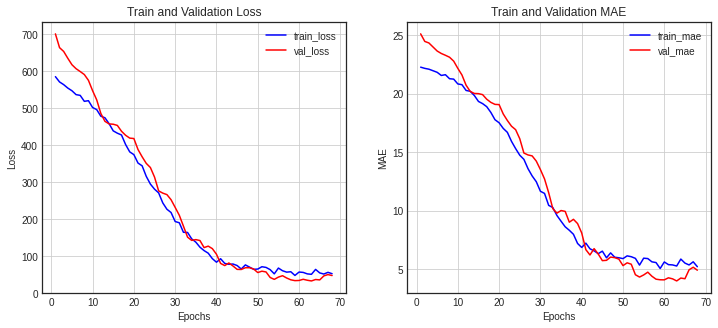

In [42]:
# 학습 히스토리의 `loss`, `val_loss`, `mae`, `val_mae`를 차트로 시각화한다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']  # 수정
val_mae = history_dict['val_mae']  # 수정

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')  # 수정
ax2.plot(epochs, val_mae, 'r-', label='val_mae')  # 수정
ax2.set_title('Train and Validation MAE')  # 수정
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')  # 수정
ax2.grid()
ax2.legend()

plt.show()


In [44]:
# 모델 평가 및 예측

In [45]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가한다.


# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ModelCheckpoint와 EarlyStopping 콜백 함수 적용
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(train_data, train_labels, epochs=100, batch_size=32, 
                    validation_data=(test_data, test_labels), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


In [46]:
# CIFAR10 딥러닝 모델 (NODE 10-4)

In [48]:
# 데이터 로드 및 전처리

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [49]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리한다.
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split


# cifar10 데이터 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()


# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력한다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))


전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [50]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의한다.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

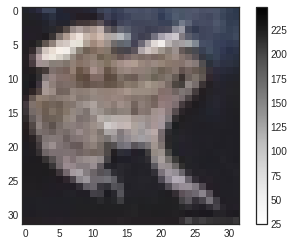

In [51]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화한다.

plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [52]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력한다.

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [53]:
# 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해준다.


# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형한다.

x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [54]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환한다.

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [56]:
# 모델 구성 및 컴파일

# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성한다.


from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [57]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               786688    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)              

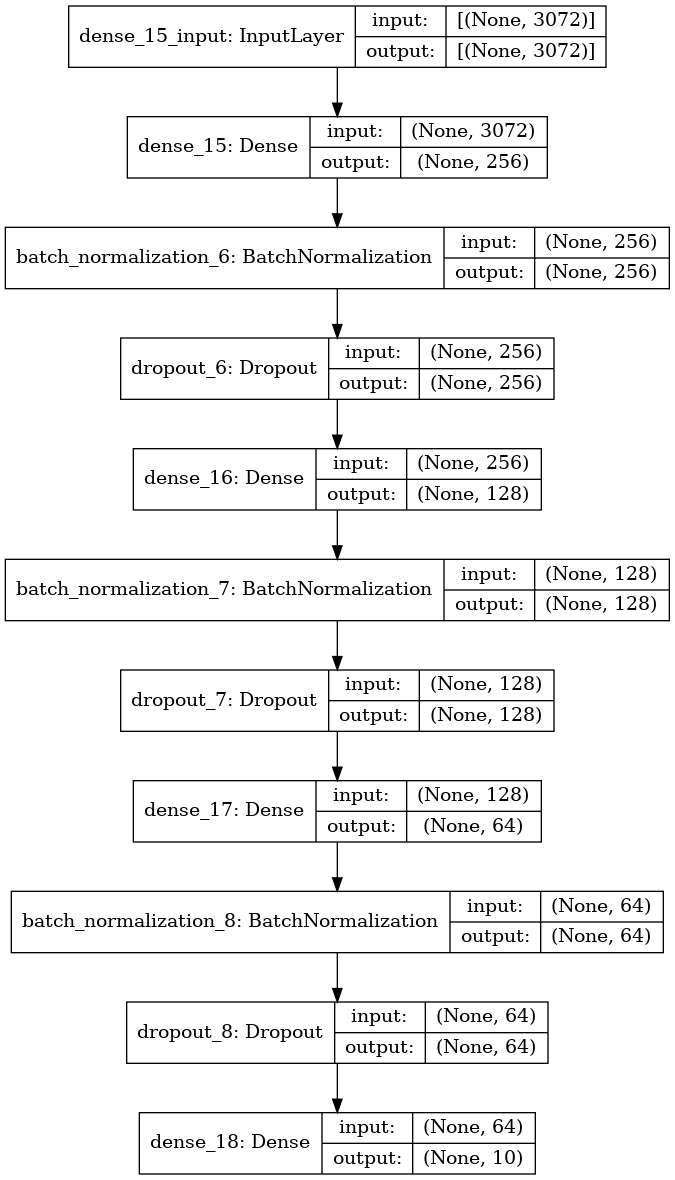

In [58]:
utils.plot_model(model, show_shapes=True)

In [59]:
#  모델 학습

In [60]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행한다.


checkpoint_cb = callbacks.ModelCheckpoint("best_cifar10_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=128, 
                    validation_data=(x_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
313/313 [==============================] - 4s 9ms/step - loss: 2.3933 - accuracy: 0.2112 - val_loss: 1.9107 - val_accuracy: 0.3004
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9667 - accuracy: 0.2871 - val_loss: 1.8047 - val_accuracy: 0.3451
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8957 - accuracy: 0.3118 - val_loss: 1.7933 - val_accuracy: 0.3560
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8610 - accuracy: 0.3333 - val_loss: 1.8105 - val_accuracy: 0.3555
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8499 - accuracy: 0.3361 - val_loss: 1.8573 - val_accuracy: 0.3271
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8320 - accuracy: 0.3412 - val_loss: 1.7217 - val_accuracy: 0.3848
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8264 - accuracy: 0.3427 - val_loss: 1.9934 - val_accuracy: 0.2756
Epoch 

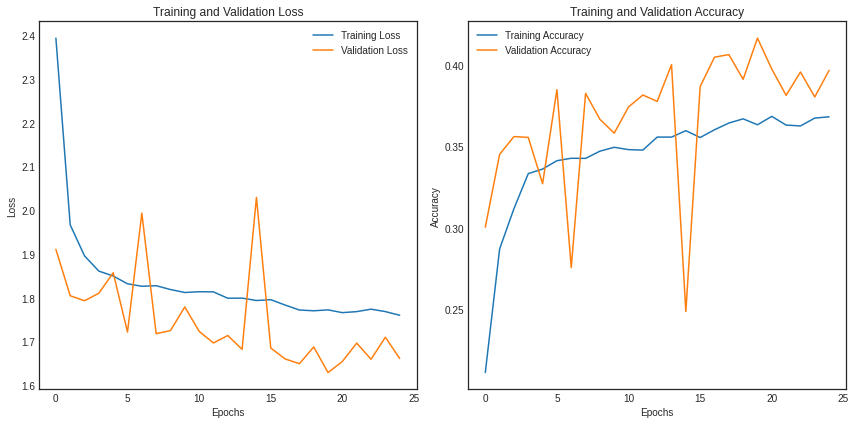

In [61]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화한다.


import matplotlib.pyplot as plt

# 히스토리에서 손실값과 정확도 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 손실 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
# 모델 평가 및 예측

In [63]:
# 테스트 데이터셋을 이용해 모델을 평가한다.

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6128 - accuracy: 0.4180


[1.6127570867538452, 0.4180000126361847]

In [ ]:
# 회고록

"""
<CIFAR10 데이터의 분류 프로젝트>


데이터 전처리: CIFAR-10 데이터를 로드하고 훈련/검증/테스트 데이터셋으로 나누었습니다. 
               이미지 데이터를 0과 1 사이의 값으로 스케일 조정하였습니다.
               
               
모델 구성: 다층 퍼셉트론(MLP)을 사용하여 이미지 분류 모델을 구성했습니다. 
           BatchNormalization과 Dropout을 활용하여 과적합을 방지했습니다.
           
           
모델 학습: ModelCheckpoint와 EarlyStopping을 적용하여 모델 학습을 진행하였고, 
           학습 히스토리를 시각화하여 모델 성능을 평가했습니다.


전반적으로 주어진 프로젝트에 대해 데이터 전처리, 모델 구성, 학습 등의 기본 단계를 따르며 적절한 평가 기준에 맞추어 작업을 수행했습니다. 특히, EarlyStopping과 ModelCheckpoint를 사용하여 모델의 안정성을 높이는 데에 주력했습니다. 
더 나아가 세밀한 튜닝과 다양한 모델 아키텍처를 탐구하며 성능을 개선하는 것이 가능할 것으로 보입니다.
앞으로 배울 과정들을 통해서 더 나은 모델을 만들 수 있을 거란 확신이 생기고 점점 더 흥미로워지는 것 같습니다.

"""